In [15]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

letter_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
names = ["lettr", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar", "x2bar", 
         "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]
letter_data = pd.read_csv(letter_url, names=names)

In [3]:
### Parametros
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = letter_data.drop(["lettr"], axis=1)
Y = letter_data['lettr']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [7]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### Variando max Depth/Criterio

[0.07042726106580943, 0.12735586377622948, 0.17685562026216234, 0.25421945553891134, 0.3689887918905936, 0.45996643436828827, 0.5542495041742459, 0.6221238332719098, 0.6636181643996453, 0.7117718359825995, 0.7486345960154183, 0.7743499151621697, 0.7980661670344988, 0.8126943984971664, 0.8245636639490377, 0.8332129180481829]
[0.0025516657218666843, 0.00507436557807731, 0.006282574007041155, 0.00834768896415604, 0.013010550580616499, 0.015018824631994256, 0.017526293295536337, 0.018093649157228504, 0.01562316339588411, 0.01295752367422137, 0.012159404727820974, 0.009172058536172988, 0.005752883230961172, 0.0076595497175932625, 0.0075485444990623105, 0.00896237922876281]


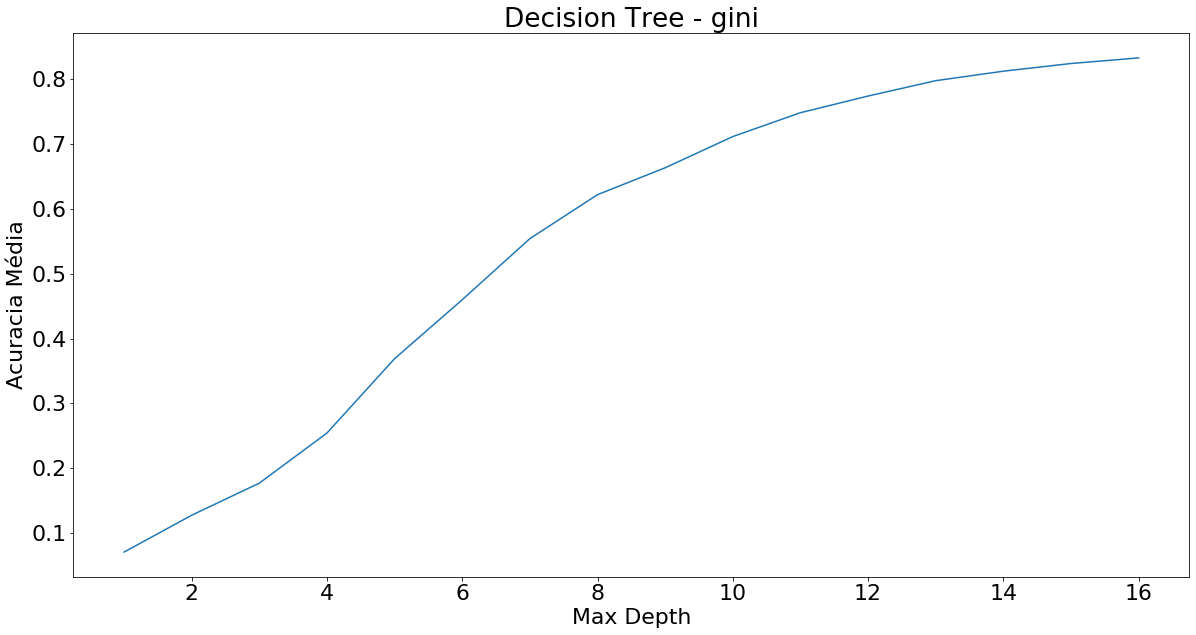

[0.07036158904666581, 0.13328957056173246, 0.23834270293099014, 0.3466263548204112, 0.49099521851729805, 0.5879289044785693, 0.6628326805332037, 0.7223367482101577, 0.7707613431333606, 0.8037676207231316, 0.8328920692921837, 0.8523251328280713, 0.8619690644173084, 0.8661873072388353, 0.8712564372952014, 0.868063020694833]
[0.0016298232077002405, 0.0032681380042760004, 0.005689406886769608, 0.008553570887710424, 0.01060600511392999, 0.010228135141139495, 0.018005925597502075, 0.015080878170527745, 0.010745922727459821, 0.008524463576934876, 0.009497468643209297, 0.008194864140752782, 0.007779410426090399, 0.008749865917357321, 0.007242457068168164, 0.005392977459361264]


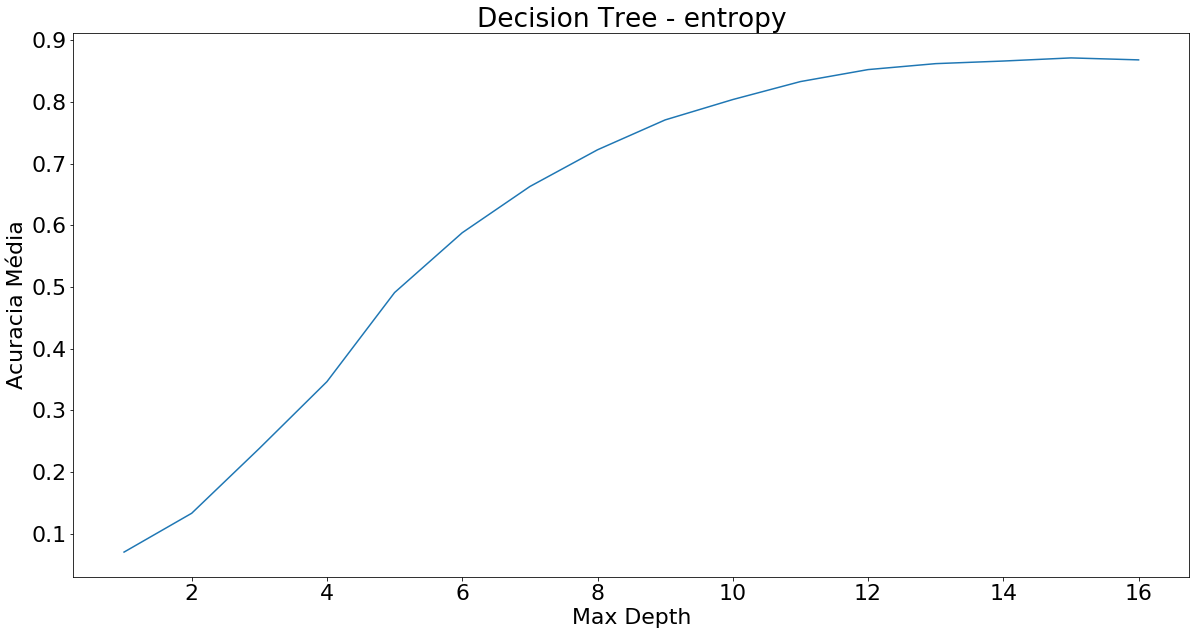

In [14]:
criterios = ['gini', 'entropy']
max_depth = [i for i in range(1, 17)]


for c in criterios:
    means=[]
    stds=[]
    
    for md in max_depth:
        tree = DecisionTreeClassifier(criterion=c, splitter='best', max_depth=md, presort=True, random_state=42)
        all_accuracies = cross_val_score(estimator=tree, X=X_train, y=Y_train, cv=10)
        means.append(all_accuracies.mean())
        stds.append(all_accuracies.std())
    

    print(means)
    print(stds)
    # plotting the points  
    plt.plot(max_depth, means) 

    # naming the x axis 
    plt.xlabel('Max Depth') 
    # naming the y axis 
    plt.ylabel('Acuracia Média') 

    # giving a title to my graph 
    plt.title('Decision Tree - ' + c) 

    # function to show the plot 
    plt.show() 

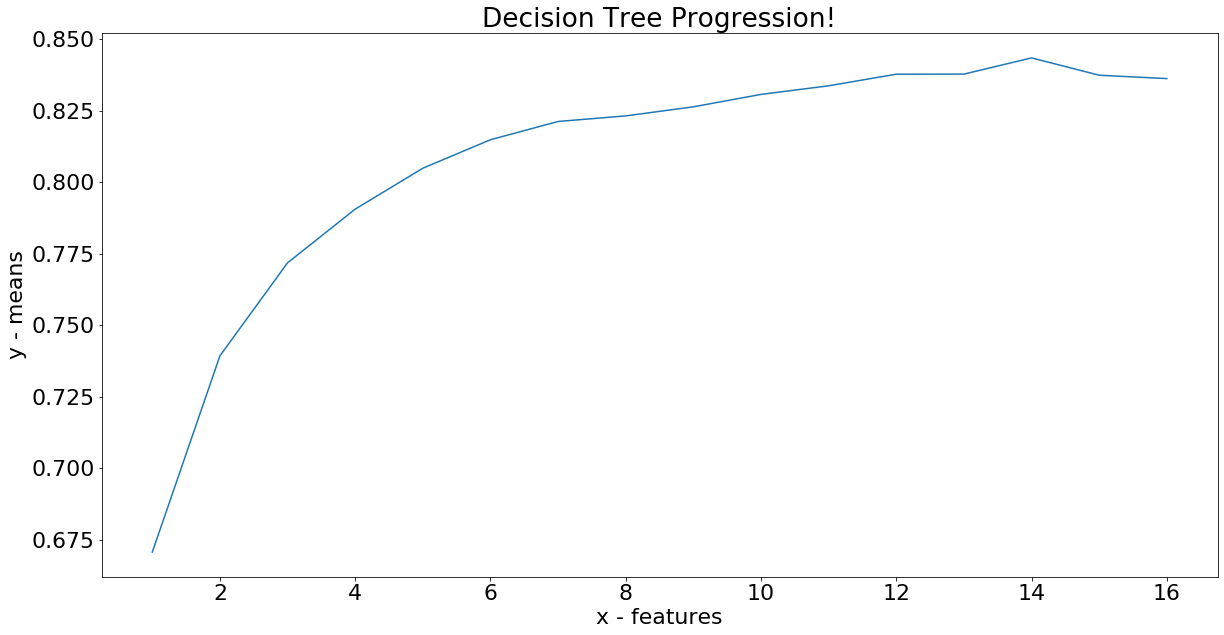

In [12]:
features=range(1,len(names))
means=[]
stds=[]
for i in features:
  tree = DecisionTreeClassifier(criterion='gini', splitter='random', max_features=i, presort=True, random_state=42)
  all_accuracies = cross_val_score(estimator=tree, X=X_train, y=Y_train, cv=10)
  means.append(all_accuracies.mean())
  stds.append(all_accuracies.std())
  
# plotting the points  
plt.plot(features, means) 
  
# naming the x axis 
plt.xlabel('x - features') 
# naming the y axis 
plt.ylabel('y - means') 
  
# giving a title to my graph 
plt.title('Decision Tree Progression!') 
  
# function to show the plot 
plt.show() 

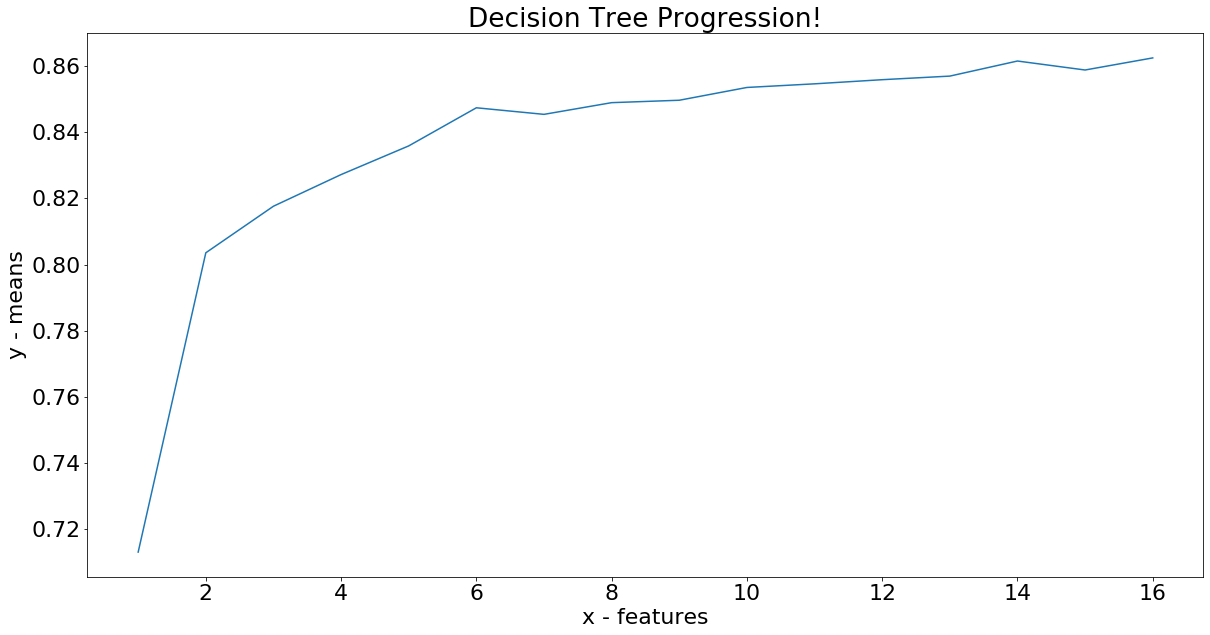

In [13]:
features=range(1,len(names))
means=[]
stds=[]
for i in features:
  tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_features=i, presort=True, random_state=42)
  all_accuracies = cross_val_score(estimator=tree, X=X_train, y=Y_train, cv=10)
  means.append(all_accuracies.mean())
  stds.append(all_accuracies.std())
  
# plotting the points  
plt.plot(features, means) 
  
# naming the x axis 
plt.xlabel('x - features') 
# naming the y axis 
plt.ylabel('y - means') 
  
# giving a title to my graph 
plt.title('Decision Tree Progression!') 
  
# function to show the plot 
plt.show() 

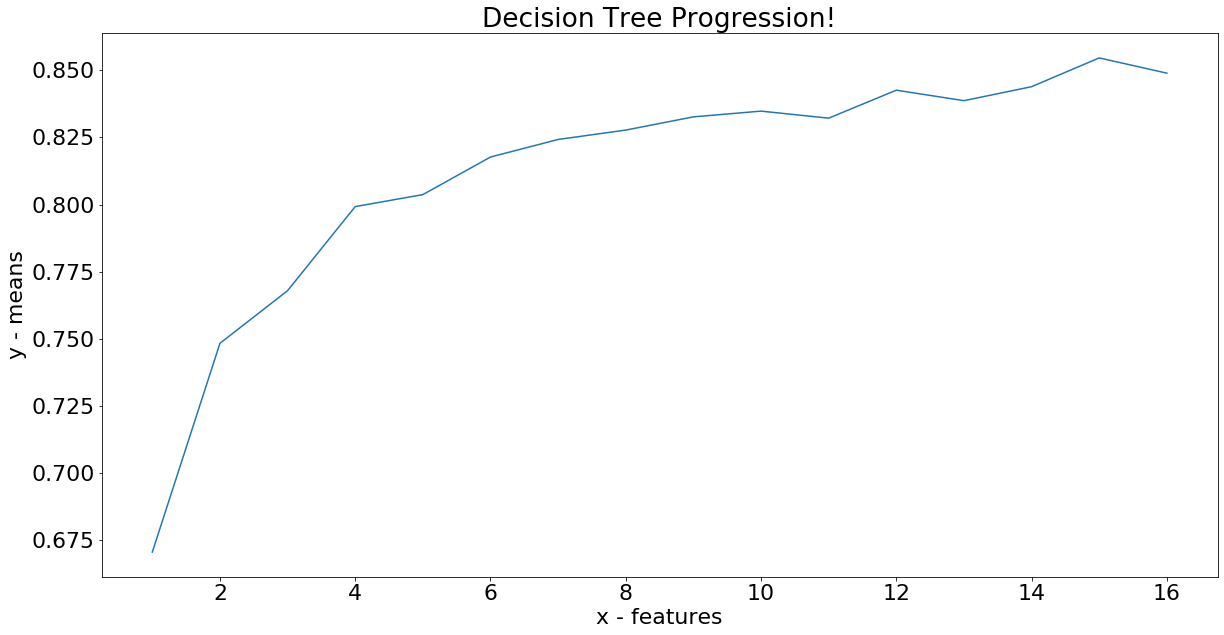

In [14]:
features=range(1,len(names))
means=[]
stds=[]
for i in features:
  tree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_features=i, presort=True, random_state=42)
  all_accuracies = cross_val_score(estimator=tree, X=X_train, y=Y_train, cv=10)
  means.append(all_accuracies.mean())
  stds.append(all_accuracies.std())
  
# plotting the points  
plt.plot(features, means) 
  
# naming the x axis 
plt.xlabel('x - features') 
# naming the y axis 
plt.ylabel('y - means') 
  
# giving a title to my graph 
plt.title('Decision Tree Progression!') 
  
# function to show the plot 
plt.show() 

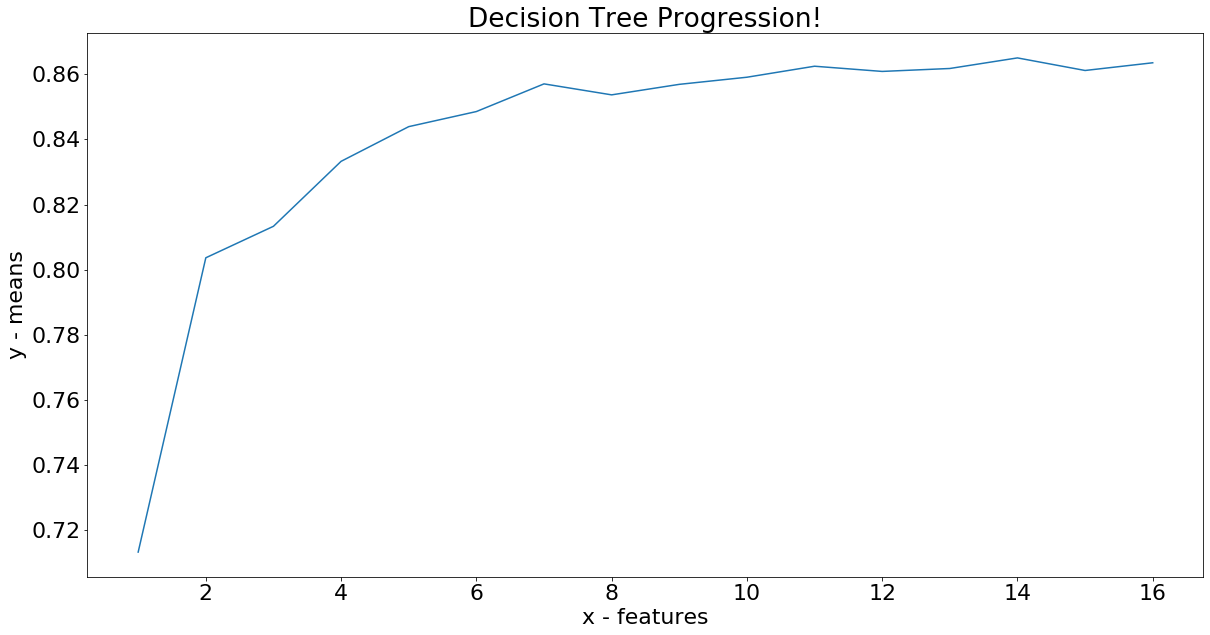

In [15]:
features=range(1,len(names))
means=[]
stds=[]
for i in features:
  tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=i, presort=True, random_state=42)
  all_accuracies = cross_val_score(estimator=tree, X=X_train, y=Y_train, cv=10)
  means.append(all_accuracies.mean())
  stds.append(all_accuracies.std())
  
# plotting the points  
plt.plot(features, means) 
  
# naming the x axis 
plt.xlabel('x - features') 
# naming the y axis 
plt.ylabel('y - means') 
  
# giving a title to my graph 
plt.title('Decision Tree Progression!') 
  
# function to show the plot 
plt.show() 

In [19]:
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', presort=True, random_state=42)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           A       0.97      0.94      0.96       253
           B       0.87      0.79      0.83       252
           C       0.87      0.90      0.89       219
           D       0.87      0.82      0.85       268
           E       0.86      0.82      0.84       219
           F       0.87      0.84      0.85       237
           G       0.87      0.88      0.88       222
           H       0.78      0.80      0.79       208
           I       0.88      0.94      0.91       250
           J       0.88      0.89      0.88       214
           K       0.82      0.81      0.81       216
           L       0.96      0.92      0.94       236
           M       0.92      0.92      0.92       235
           N       0.90      0.91      0.91       232
           O       0.85      0.87      0.86       228
           P       0.84      0.91      0.87       227
           Q       0.91      0.84      0.87       247
           R       0.81    